# scikit-learn: สร้าง dummy/one-hot คอลัมน์ จาก multivalued column ด้วย MultiLabelBinarizer
* doc: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

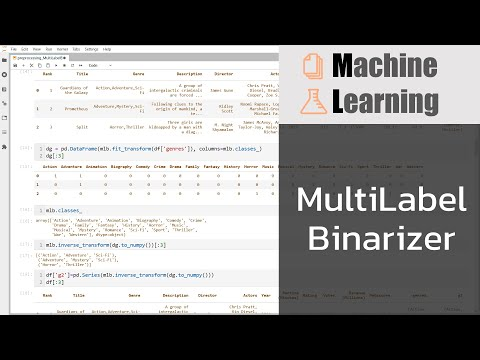

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('c61y1-Lg37g', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np

In [3]:
print(f'pandas version: {pd.__version__}')
print(f'numpy  version: {np.__version__}')

pandas version: 1.1.3
numpy  version: 1.19.2


In [4]:
pd.Timestamp.now()

Timestamp('2020-12-05 11:15:59.678202')

In [5]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/IMDB_Movie_1000_Data.csv'
df=pd.read_csv(url)
df[:5]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## scikit-learn: MultiLabelBinarizer

In [6]:
import sklearn
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [7]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 0.23.2


In [8]:
df['genres']=df['Genre'].str.split(',\s*')
df[:5]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,genres
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,"[Action, Adventure, Sci-Fi]"
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,"[Adventure, Mystery, Sci-Fi]"
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,"[Horror, Thriller]"
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,"[Animation, Comedy, Family]"
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,"[Action, Adventure, Fantasy]"


### fit vs. transform

In [9]:
mlb = MultiLabelBinarizer()
mlb.fit(df['genres'])

MultiLabelBinarizer()

In [10]:
mlb.classes_

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'], dtype=object)

In [11]:
df['genres'].explode().unique()

array(['Action', 'Adventure', 'Sci-Fi', 'Mystery', 'Horror', 'Thriller',
       'Animation', 'Comedy', 'Family', 'Fantasy', 'Drama', 'Music',
       'Biography', 'Romance', 'History', 'Crime', 'Western', 'War',
       'Musical', 'Sport'], dtype=object)

In [12]:
(pd.Series(df['genres'].explode().unique()).sort_values()).to_numpy()

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'], dtype=object)

In [13]:
mlb.transform(df['genres']) # create dummies

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
mlb.fit_transform(df['genres'])

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
df[:3]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,genres
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,"[Action, Adventure, Sci-Fi]"
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,"[Adventure, Mystery, Sci-Fi]"
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,"[Horror, Thriller]"


In [16]:
dg = pd.DataFrame(mlb.fit_transform(df['genres']), columns=mlb.classes_)
dg[:3]

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [17]:
mlb.classes_

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'], dtype=object)

In [18]:
mlb.inverse_transform(dg.to_numpy())[:3]

[('Action', 'Adventure', 'Sci-Fi'),
 ('Adventure', 'Mystery', 'Sci-Fi'),
 ('Horror', 'Thriller')]

In [19]:
df['g2']=pd.Series(mlb.inverse_transform(dg.to_numpy()))
df[:3]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,genres,g2
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,"[Action, Adventure, Sci-Fi]","(Action, Adventure, Sci-Fi)"
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,"[Adventure, Mystery, Sci-Fi]","(Adventure, Mystery, Sci-Fi)"
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,"[Horror, Thriller]","(Horror, Thriller)"


In [20]:
df['g2'].str.join(',')

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: g2, Length: 1000, dtype: object

In [21]:
dg.loc[0]

Action       1
Adventure    1
Animation    0
Biography    0
Comedy       0
Crime        0
Drama        0
Family       0
Fantasy      0
History      0
Horror       0
Music        0
Musical      0
Mystery      0
Romance      0
Sci-Fi       1
Sport        0
Thriller     0
War          0
Western      0
Name: 0, dtype: int32

In [22]:
g = np.array([
    dg.loc[0],
    dg.loc[1],
    dg.loc[4]
])
mlb.inverse_transform(g)

[('Action', 'Adventure', 'Sci-Fi'),
 ('Adventure', 'Mystery', 'Sci-Fi'),
 ('Action', 'Adventure', 'Fantasy')]

In [23]:
np.array(dg.loc[0])

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [24]:
mlb.classes_

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'], dtype=object)

In [25]:
g = np.array([
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1]    
])
mlb.inverse_transform(g)

[('Action', 'Adventure', 'Sci-Fi', 'Western'),
 ('Action', 'Adventure', 'Music', 'War', 'Western')]

In [26]:
df=pd.concat([df, dg], axis='columns')
df[:3]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,...,0,0,0,0,0,1,0,0,0,0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,...,0,0,0,1,0,1,0,0,0,0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,...,1,0,0,0,0,0,0,1,0,0


In [27]:
df.dropna(inplace=True)

## sklearn: LinearRegression

In [28]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'genres', 'g2', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [29]:
X=df[['Runtime (Minutes)', 'Rating', 'Votes', 'Metascore', 
      'Action', 'Adventure', 'Animation', 'Biography', 
      'Comedy', 'Crime', 'Drama', 'Family', 
      'Fantasy', 'History', 'Horror',
      'Music', 'Mystery', 'Romance', 'Sci-Fi', 
      'Thriller', 'War', 'Western']]

# X=df[['Runtime (Minutes)', 'Rating', 'Votes', 'Metascore']]

# X=df[['Rating', 'Votes']]

y=df['Revenue (Millions)']

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Runtime (Minutes)  838 non-null    int64  
 1   Rating             838 non-null    float64
 2   Votes              838 non-null    int64  
 3   Metascore          838 non-null    float64
 4   Action             838 non-null    int32  
 5   Adventure          838 non-null    int32  
 6   Animation          838 non-null    int32  
 7   Biography          838 non-null    int32  
 8   Comedy             838 non-null    int32  
 9   Crime              838 non-null    int32  
 10  Drama              838 non-null    int32  
 11  Family             838 non-null    int32  
 12  Fantasy            838 non-null    int32  
 13  History            838 non-null    int32  
 14  Horror             838 non-null    int32  
 15  Music              838 non-null    int32  
 16  Mystery            838 non

In [31]:
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    random_state=7)

In [32]:
model = LinearRegression()
model

LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

In [34]:
model.score(X_train, y_train) # R-squared

0.5726696280311907

In [35]:
model.intercept_

4.559321311985727

In [36]:
model.coef_

array([ 9.40352619e-01, -1.56790780e+01,  3.08627171e-04,  3.56937783e-01,
        1.24755022e+01,  2.78981360e+01,  1.00064843e+02,  3.19616480e+00,
       -9.36274458e-01, -1.74168581e+01, -2.79471716e+01,  2.25421662e+01,
        1.43519754e+01, -4.65335480e+00, -9.02213840e+00,  5.10484833e+00,
       -1.30694753e+01, -4.64000289e+00, -2.48969927e+00, -4.28189034e+00,
       -2.64791079e+01,  6.71424877e+00])

In [37]:
X.columns

Index(['Runtime (Minutes)', 'Rating', 'Votes', 'Metascore', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [38]:
pd.Series(model.coef_, index=X.columns)

Runtime (Minutes)      0.940353
Rating               -15.679078
Votes                  0.000309
Metascore              0.356938
Action                12.475502
Adventure             27.898136
Animation            100.064843
Biography              3.196165
Comedy                -0.936274
Crime                -17.416858
Drama                -27.947172
Family                22.542166
Fantasy               14.351975
History               -4.653355
Horror                -9.022138
Music                  5.104848
Mystery              -13.069475
Romance               -4.640003
Sci-Fi                -2.489699
Thriller              -4.281890
War                  -26.479108
Western                6.714249
dtype: float64

In [39]:
model.predict(X_test)

array([130.07340751,  38.70794649,  14.13421054,  92.69671655,
        30.26725377, 211.02759789,  54.97498221, 438.88121453,
       115.18713205,  75.12026431, 112.82057122,  -6.34044986,
        51.22588274, 202.33097164,  -2.9038598 , 312.20626856,
        17.947256  ,  93.85155886,  96.6334835 ,  -3.48951708,
        91.75324715, 193.48296832, 124.70225265,  34.36987608,
       177.30532496,  -1.80931436, 198.5017026 , 164.5468235 ,
       137.63248895,  92.71041263,  46.67890898, 225.60162612,
        83.76642271,  34.81472185,  58.08162401,  36.02351874,
       219.63875506,  61.14307179,  44.28210247, -37.27356734,
       139.37786055,  37.70000176,  23.05587051,  17.09155609,
       119.3038578 , 166.95160088,  37.46068849,  82.18422775,
       155.46107787,  38.96730342,  14.01678003,  -3.47688646,
       124.5047579 ,  36.07602482,  90.31614142, 173.40849289,
       132.08959397,  12.2632741 , 158.52482742, 198.20346654,
        60.70002118, 153.39904834, 356.39140891, 198.87

In [40]:
dt=y_test.reset_index()
dt[:3]

,index,Revenue (Millions)
0,267,27.10
1,831,49.00
2,72,3.73


In [41]:
dt['y_pred']=model.predict(X_test)
dt['dif']=dt['Revenue (Millions)']-dt['y_pred']
dt[:3]

,index,Revenue (Millions),y_pred,dif
0,267,27.10,130.073408,-102.973408
1,831,49.00,38.707946,10.292054
2,72,3.73,14.134211,-10.404211


In [42]:
models=[
    [LinearRegression(), 'LinearRegression'],
    [Ridge(alpha=10), 'Ridge'],
    [Lasso(alpha=10), 'Lasso']
]
mp=[]
for m in models:
    mx=m[0]
    mx.fit(X_train, y_train)
    mp.append([m[1], mx.score(X_test, y_test)])
mp

[['LinearRegression', 0.5756848203731457],
 ['Ridge', 0.574197283579799],
 ['Lasso', 0.45919799707790976]]